철학과 1826032 이로움 4월 첫 번째 과제

In [14]:
## 기본
import numpy as np                    # numpy 패키지 가져오기
import pandas as pd                   # pandas 패키지 가져오기
import matplotlib.pyplot as plt       # 시각화 패키지 가져오기

## Text 데이터 처리
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Komoran
from konlpy.tag import Hannanum

from collections import Counter
from wordcloud import WordCloud

from bs4 import BeautifulSoup
import requests

import warnings
warnings.filterwarnings('ignore')

In [21]:
# 해드라인 검색 및 추출 함수를 정의
# 검색 키워드 & 스타트 페이지 & 검색 마지막 페이지를 parameter(매개변수) 로 받음
# 파이썬은 매개변수가 여러개 인 경우 뒤의 매개 변수부터 디폴트값을 가질 수 있음 

title_list = []

def web_scraping(keyword, end, start = 1):    # 시작 페이지의 default 값은 1 (즉, 첫 페이지 부터 시작) 
    while 1:

        if start > (end * 10) :    # 스타트 페이지가 마지막 페이지보다 크면 while 문을 빠져 나감 
            break        
        
        url ='https://search.naver.com/search.naver?where=news&sm=tab_pge&query={}&start={}'.format(keyword,start)
        #q : 쿼리(검색어)
        #괄호 안에 숫자를 써주면, 그 순서대로 나옴. (0, 1)
        #네이버 url = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query={}&start=41
        #변하지 않는 값은 지워도 무방. 

        req = requests.get(url)    # 해당 페이지를 가져옴

        page = BeautifulSoup(req.text, 'html.parser')

        titles = page.find_all(attrs='news_tit')     # 헤드라인 기사를 가져옴 
        
        print(titles)       # 추출한 헤드라인을 확인 (10개)

        for one in titles:
            title_list.append(one.text)
            
        start += 10
        #네이버는 10씩 증가함
        
#네이버 뉴스는 본문을 가져올 수 있지만, '위키트리'등의 소규모는 힘들다.

In [23]:
# 검색어를 입력 받음 


keyword = input('검색어를 입력하세요 : ')
print()

end_page = int(input('end_page를 입력하세요 : ')) #end_page는 정수 페이지 입력받아야함

web_scraping(keyword, end_page) #start페이지 지정 안하면 1페이지임


검색어를 입력하세요 : 인공지능

end_page를 입력하세요 : 2
[<a class="news_tit" href="http://www.edaily.co.kr/news/newspath.asp?newsid=02161526629020384" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=1&amp;i=880000E7_000000000000000004913108&amp;g=018.0004913108&amp;u='+urlencode(this.href));" target="_blank" title="삼성전자, 인공지능 로봇청소기 '비스포크 제트봇 AI' 출시">삼성전자, <mark>인공지능</mark> 로봇청소기 '비스포크 제트봇 AI' 출시</a>, <a class="news_tit" href="http://www.hani.co.kr/arti/economy/consumer/992773.html" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=6&amp;i=88000103_000000000000000002542099&amp;g=028.0002542099&amp;u='+urlencode(this.href));" target="_blank" title="삼성전자, 인공지능 청소기 ‘비스포크 제트 봇 AI’ 출시">삼성전자, <mark>인공지능</mark> 청소기 ‘비스포크 제트 봇 AI’ 출시</a>, <a class="news_tit" href="http://www.newsis.com/view/?id=NISX20210427_0001420869&amp;cID=10802&amp;pID=14000" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=11&amp;i=88000127_000000000000000010467974&amp;g=003.0010467974&amp;u='+urlencode(this.href));" target="_blank" 

In [24]:
# 수집해온 헤드라인 갯수를 확인 

print(len(title_list))

70


데이터 분석 단계

In [25]:
# 형태소 분석 - 분석하는데 약간의 시간이 걸림 

kkma = Kkma()
#코코마는 형태소가 많다

sentences_tag = []

for sentence in title_list:
    word_tag = kkma.pos(sentence)
    sentences_tag.append(word_tag)


print(sentences_tag)

[[('삼성전자', 'NNG'), (',', 'SP'), ('인공지능', 'NNG'), ('로봇', 'NNG'), ('청소기', 'NNG'), ("'", 'SS'), ('비스', 'UN'), ('포크', 'NNG'), ('제트', 'NNG'), ('봇', 'UN'), ('AI', 'OL'), ("'", 'SS'), ('출시', 'NNG')], [('삼성전자', 'NNG'), (',', 'SP'), ('인공지능', 'NNG'), ('청소기', 'NNG'), ('‘', 'SS'), ('비스', 'UN'), ('포크', 'NNG'), ('제트', 'NNG'), ('봇', 'UN'), ('AI', 'OL'), ('’', 'SS'), ('출시', 'NNG')], [('인천시', 'NNG'), (',', 'SP'), ('인공지능', 'NNG'), ('덕분', 'NNG'), ('에', 'JKM'), ('…', 'SE'), ('방', 'NNG'), ('역', 'NNG'), ('역할', 'NNG'), ('톡톡', 'MAG')], [('단국', 'NNG'), ('대', 'NNG'), (',', 'SP'), ('학생', 'NNG'), ('에게', 'JKM'), ('인공지능', 'NNG'), ('비서', 'NNG'), ('제공', 'NNG')], [('전', 'NNG'), ('북', 'NNG'), ('교육청', 'NNG'), (',', 'SP'), ('인공지능', 'NNG'), ('초등', 'NNG'), ('수업', 'NNG'), ("'", 'SS'), ('똑', 'MAG'), ('똑', 'MAG'), ('!', 'SF'), ('수학', 'NNG'), ('탐험대', 'NNG'), ("'", 'SS'), ('도입', 'NNG')], [('한컴', 'NNG'), ('인텔리', 'NNG'), ('전', 'NNG'), ('슬', 'VA'), ('·', 'SP'), ('곰', 'NNG'), ('앤', 'NNG'), ('컴퍼니', 'NNG'), (',', 'SP'), ('인공지능', 'NNG

In [26]:
# 형태소 분석 후 명사만 추출

noun_list = []

for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['NNG']:               # okt = Okt() 인 경우  if tag in ['Noun']:
            noun_list.append(word)
            
print(noun_list)

['삼성전자', '인공지능', '로봇', '청소기', '포크', '제트', '출시', '삼성전자', '인공지능', '청소기', '포크', '제트', '출시', '인천시', '인공지능', '덕분', '방', '역', '역할', '단국', '대', '학생', '인공지능', '비서', '제공', '전', '북', '교육청', '인공지능', '초등', '수업', '수학', '탐험대', '도입', '한컴', '인텔리', '전', '곰', '앤', '컴퍼니', '인공지능', '분야', '업무', '협약', '호남', '대학교', '인공지능', '신기술', '릴레이', '특강', '아이', '반', '인공지능', '오디오', '티', '공개', '분위기', '노래', '인공지능', '사서', '론', '배송', '후', '도서관', '인공지능', '투자', '파', '투자자', '적립', '투자', '인공지능', '로봇', '청소기', '포크', '제트', '소개', '인공지능', '세상', '청소년', '아이디어', '전', '북', '교육청', '인공지능', '초등', '수업', '수학', '탐험대', '도입', '한컴', '인텔리', '전', '곰', '앤', '컴퍼니', '인공지능', '분야', '업무', '협약', '호남', '대학교', '인공지능', '신기술', '릴레이', '특강', '전시', '교육청', '대전', '인공지능', '교육', '문화', '아이', '반', '인공지능', '오디오', '티', '공개', '분위기', '노래', '인', '하대', '인천', '최초', '인공지능', '특화', '연구', '교육', '기관', '대우', '건설', '전자', '인공지능', '단지', '구축', '넷', '인공지능', '기반', '원격', '시험', '감독', '서비스', '출시', '광주', '코로나', '방역', '인공지능', '활용', '기고', '인공지능', '프로젝트', '기반', '학습', '로봇', '플랫폼', '기반', '고객', '맞춤'

In [27]:
# 명사 중에서 두음절 단어만 추출 


print('▶ 전체 명사의 수 = ', len(noun_list))
print() 

noun_list = [word for word in noun_list if len(word) > 1]    # 명사중에서 두음절 이상의 단어  추출


print('▶ 두음절 이상의 명사의 수 = ', len(noun_list))
print() 

print(noun_list[:100])   # 처음부터 나오는 순서대로 100개 단어 출력 

▶ 전체 명사의 수 =  514

▶ 두음절 이상의 명사의 수 =  453

['삼성전자', '인공지능', '로봇', '청소기', '포크', '제트', '출시', '삼성전자', '인공지능', '청소기', '포크', '제트', '출시', '인천시', '인공지능', '덕분', '역할', '단국', '학생', '인공지능', '비서', '제공', '교육청', '인공지능', '초등', '수업', '수학', '탐험대', '도입', '한컴', '인텔리', '컴퍼니', '인공지능', '분야', '업무', '협약', '호남', '대학교', '인공지능', '신기술', '릴레이', '특강', '아이', '인공지능', '오디오', '공개', '분위기', '노래', '인공지능', '사서', '배송', '도서관', '인공지능', '투자', '투자자', '적립', '투자', '인공지능', '로봇', '청소기', '포크', '제트', '소개', '인공지능', '세상', '청소년', '아이디어', '교육청', '인공지능', '초등', '수업', '수학', '탐험대', '도입', '한컴', '인텔리', '컴퍼니', '인공지능', '분야', '업무', '협약', '호남', '대학교', '인공지능', '신기술', '릴레이', '특강', '전시', '교육청', '대전', '인공지능', '교육', '문화', '아이', '인공지능', '오디오', '공개', '분위기', '노래', '하대']


In [28]:
# 단어의 출현 횟수 카운트

counts = Counter(noun_list)

words = counts.most_common(50)     # 가장 많이 출현한 횟수 순으로 50개 단어만 추출 한 후 word clouding  

print(words)


[('인공지능', 72), ('대전', 8), ('출시', 7), ('교육', 7), ('청소기', 6), ('포크', 6), ('제트', 6), ('교육청', 6), ('기반', 6), ('학습', 6), ('로봇', 5), ('분야', 5), ('서비스', 5), ('국제', 5), ('삼성전자', 4), ('초등', 4), ('수업', 4), ('수학', 4), ('탐험대', 4), ('도입', 4), ('한컴', 4), ('인텔리', 4), ('컴퍼니', 4), ('업무', 4), ('협약', 4), ('호남', 4), ('대학교', 4), ('신기술', 4), ('릴레이', 4), ('특강', 4), ('아이', 4), ('오디오', 4), ('공개', 4), ('분위기', 4), ('노래', 4), ('투자', 4), ('인천', 4), ('연구', 4), ('기술', 4), ('데이터', 4), ('제공', 3), ('도서관', 3), ('문화', 3), ('하대', 3), ('최초', 3), ('특화', 3), ('기관', 3), ('구축', 3), ('원격', 3), ('시험', 3)]


{'인공지능': 72, '대전': 8, '출시': 7, '교육': 7, '청소기': 6, '포크': 6, '제트': 6, '교육청': 6, '기반': 6, '학습': 6, '로봇': 5, '분야': 5, '서비스': 5, '국제': 5, '삼성전자': 4, '초등': 4, '수업': 4, '수학': 4, '탐험대': 4, '도입': 4, '한컴': 4, '인텔리': 4, '컴퍼니': 4, '업무': 4, '협약': 4, '호남': 4, '대학교': 4, '신기술': 4, '릴레이': 4, '특강': 4, '아이': 4, '오디오': 4, '공개': 4, '분위기': 4, '노래': 4, '투자': 4, '인천': 4, '연구': 4, '기술': 4, '데이터': 4, '제공': 3, '도서관': 3, '문화': 3, '하대': 3, '최초': 3, '특화': 3, '기관': 3, '구축': 3, '원격': 3, '시험': 3}


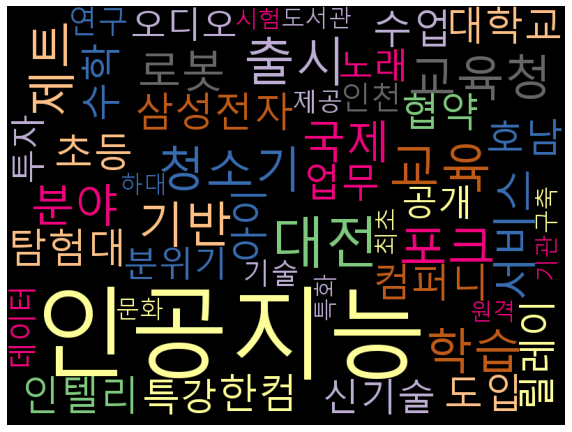

In [29]:
# wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
#                       background_color='white',                   
#                       colormap = 'Accent_r',   
#                       width=800,
#                       height=600)

wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      colormap = 'Accent_r',
                      width=800,
                      height=600)

print(dict(words))

cloud = wordcloud.generate_from_frequencies(dict(words))

plt.figure(figsize=(10, 8))

plt.axis('off')   

plt.imshow(cloud)

plt.show()